In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [147]:
pay = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')

In [148]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [149]:
pay.groupby('customerID')['countryCode'].count().sort_values()

customerID
2621-XCLEH    15
0187-ERLSR    16
7245-CKNCN    17
3676-CQAIF    17
4632-QZOKX    17
              ..
9286-VLKMI    34
0688-XNJRO    34
4640-FGEJI    35
8887-NCUZC    35
9149-MATVB    36
Name: countryCode, Length: 100, dtype: int64

In [150]:
pay['PaperlessDate'] = pd.to_datetime(pay['PaperlessDate'])
pay['InvoiceDate'] = pd.to_datetime(pay['InvoiceDate'])
pay['DueDate'] = pd.to_datetime(pay['DueDate'])
pay['SettledDate'] = pd.to_datetime(pay['SettledDate'])
pay['countryCode'] = pay['countryCode'].astype(str)
pay['PaymentTerm'] = (pay['DueDate'] - pay['InvoiceDate']).dt.days

In [151]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30


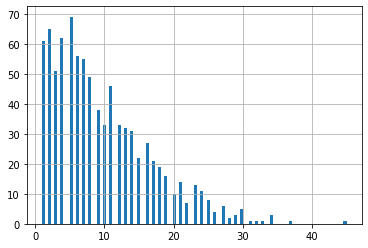

In [152]:
pay[pay['DaysLate']>0]['DaysLate'].hist(bins=100)

In [153]:
pay.loc[pay['DaysLate']==0,'DaysLate_Code'] = 'on time'
pay.loc[(pay['DaysLate']>0) & (pay['DaysLate']<11),'DaysLate_Code'] = '0-10 Days'
pay.loc[(pay['DaysLate']>10) & (pay['DaysLate']<21),'DaysLate_Code'] = '11-20 Days'
pay.loc[pay['DaysLate']>20,'DaysLate_Code'] = '20+ Days'

In [154]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30,on time
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30,0-10 Days
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30,on time
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30,0-10 Days
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30,0-10 Days


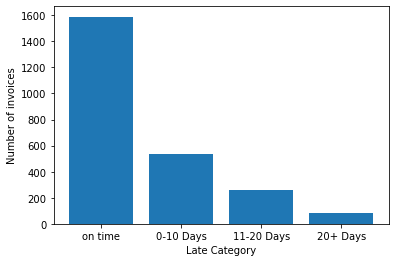

In [155]:
category_count=pay.groupby('DaysLate_Code').count().sort_values(by='customerID', ascending=False)
plt.bar(category_count.index.values, category_count['customerID'])
plt.xlabel('Late Category')
plt.ylabel('Number of invoices')
plt.show()

In [156]:
pay = pay.sort_values(by=['customerID','InvoiceDate'])

In [157]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2013-07-31,4037644863,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2013-07-31,9471530987,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2013-07-31,9744145268,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2013-07-31,7214076449,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2013-07-31,1756742390,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [158]:
pay = pay.drop(['PaperlessDate','invoiceNumber'],axis=1)

In [159]:
pay.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [160]:
pay['late_invoices'] = np.where(pay['DaysLate'] > 0,1,0)
pay['late_invoice_Amt'] = np.where(pay['DaysLate'] > 0,pay['InvoiceAmount'],0)

In [161]:
import pandasql as ps

In [162]:
sqlcode = '''select *,sum(InvoiceAmount) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoice_amt,
sum(late_invoice_Amt) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoice_amt,
sum(late_invoices) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoices,
count() over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoices
from pay'''

pay2 = ps.sqldf(sqlcode, locals())

In [163]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,NaN,NaN,NaN,0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4


In [164]:
pay2['late_invoice_amt_pct'] = pay2['total_late_invoice_amt']/pay2['total_invoice_amt']
pay2['late_invoices_pct'] = pay2['total_late_invoices']/pay2['total_invoices']

In [165]:
pay2 = pay2.replace(np.NaN,0)

In [166]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices,late_invoice_amt_pct,late_invoices_pct
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,0.00,0.0,0.0,0,0.0,0.0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1,0.0,0.0
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2,0.0,0.0
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3,0.0,0.0
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4,0.0,0.0


In [167]:
pay = pay2.drop(['countryCode','customerID','InvoiceDate','DueDate','SettledDate','DaysToSettle','DaysLate'],axis=1)

In [168]:
pay_x = pay.drop('DaysLate_Code',axis=1)
pay_y = pay[['DaysLate_Code']]

In [169]:
pay_x['Disputed'].value_counts()

No     1905
Yes     561
Name: Disputed, dtype: int64

In [170]:
pay_x['Disputed'] = np.where(pay_x['Disputed']=='Yes',1,0)

In [171]:
pay_x['PaperlessBill'].value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [172]:
pay_x['PaperlessBill'] = np.where(pay_x['PaperlessBill']=='Electronic',1,0)

In [173]:
import scipy.misc

In [239]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import classification_report

In [222]:
def draw_pr_curve(model, Y_test,y_score,classes = n_classes):
    precision = dict()
    recall = dict()
    for i in range(classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                            y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title(model + " precision vs. recall curve")
    plt.show()

In [223]:
def draw_roc_curve(model, Y_test,y_score,classes = n_classes):    
    fpr = dict()
    tpr = dict()

    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i],
                                      y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title(model + " ROC curve")
    plt.show()

In [244]:
target_names = ['on time', '0-10 Days', '11-20 Days', '20+ Days']

Y = label_binarize(pay_y, classes=target_names)
n_classes = Y.shape[1]

In [245]:
X_train_m, X_test_m,Y_train_m,Y_test_m = train_test_split(pay_x,Y,test_size=0.2,random_state=42)
X_train_d, X_test_d,Y_train_d,Y_test_d = train_test_split(pay_x,pay_y,test_size=0.2,random_state=42)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_m)
X_train_scaled_m = scaler.transform(X_train_m)
X_test_scaled_m = scaler.transform(X_test_m)

scaler = StandardScaler().fit(X_train_d)
X_train_scaled_d = scaler.transform(X_train_d)
X_test_scaled_d = scaler.transform(X_test_d)

### Logistic Regression

In [247]:
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['l1', 'l2']}]

model = LogisticRegression()

scorer = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'weighted')

model2 = GridSearchCV(model, param_grid,cv=5, n_jobs=-1,scoring=scorer)
model2.fit(X_train_scaled_d,Y_train_d)
print(model2.best_params_)
print(model2.best_score_)

{'C': 10, 'penalty': 'l1'}
0.8587775550423266


In [248]:
clf = OneVsRestClassifier(LogisticRegression(C=10,
                             penalty='l1',
                             random_state=42))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [249]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
Logit_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("Logistic test score:",Logit_test)

Logistic test score: 0.812399523671631


In [250]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.75      0.85      0.79       111
  11-20 Days       0.31      0.09      0.14        44
    20+ Days       0.00      0.00      0.00        17

   micro avg       0.91      0.85      0.88       494
   macro avg       0.51      0.48      0.48       494
weighted avg       0.85      0.85      0.84       494
 samples avg       0.85      0.85      0.85       494



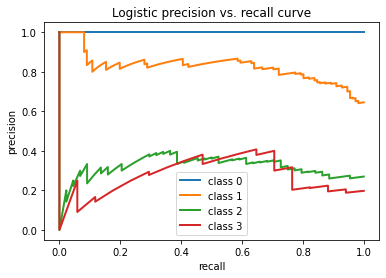

In [251]:
draw_pr_curve('Logistic',Y_test,y_score)

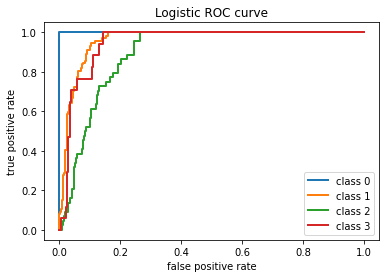

In [252]:
draw_roc_curve('Logistic',Y_test,y_score)

### KNN Classifier

In [253]:
from sklearn import neighbors
param_grid_k = [{'n_neighbors': range(1,100),'weights': ["uniform", "distance"]}]

knn_clfs = neighbors.KNeighborsClassifier()
grid_search1 = GridSearchCV(knn_clfs, param_grid_k, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train_scaled_d, Y_train_d)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'n_neighbors': 31, 'weights': 'distance'}
0.8560418639522159


In [263]:
clf = OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors=31,weights='distance'))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [264]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
knn_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("knn test score:",knn_test)

knn test score: 0.8156922223588837


In [265]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.74      0.87      0.80       111
  11-20 Days       0.38      0.11      0.18        44
    20+ Days       0.00      0.00      0.00        17

   micro avg       0.91      0.86      0.88       494
   macro avg       0.53      0.50      0.49       494
weighted avg       0.85      0.86      0.85       494
 samples avg       0.86      0.86      0.86       494



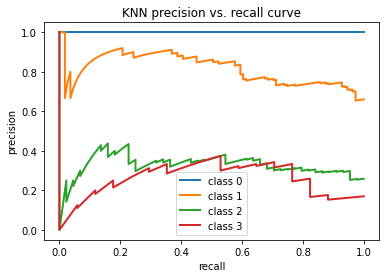

In [256]:
draw_pr_curve('KNN',Y_test,y_score)

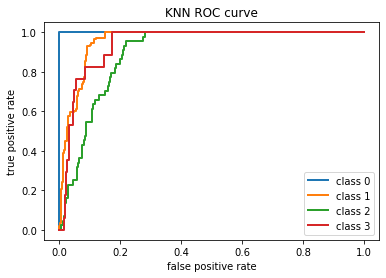

In [257]:
draw_roc_curve('KNN',Y_test,y_score)

### Decision Trees

In [258]:
# Tree Regression
from sklearn import tree

param_grid_t = [{'max_depth': range(1,20), 'min_samples_split': range(2,20)}]

tree_clf = tree.DecisionTreeClassifier()
grid_search1 = GridSearchCV(tree_clf, param_grid_t, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'max_depth': 17, 'min_samples_split': 3}
0.8501389484493068


In [266]:
clf = OneVsRestClassifier(tree.DecisionTreeClassifier(max_depth=17,min_samples_split=3))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [267]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
tree_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("Tree test score:",tree_test)

Tree test score: 0.7872617154846007


In [268]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.73      0.62      0.67       111
  11-20 Days       0.26      0.34      0.30        44
    20+ Days       0.15      0.12      0.13        17

   micro avg       0.84      0.83      0.83       494
   macro avg       0.54      0.52      0.53       494
weighted avg       0.84      0.83      0.83       494
 samples avg       0.80      0.83      0.81       494



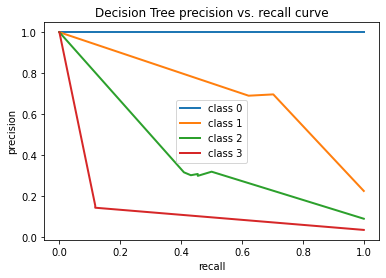

In [261]:
draw_pr_curve('Decision Tree',Y_test,y_score)

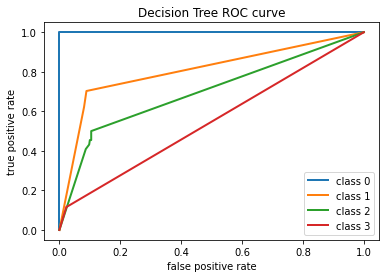

In [262]:
draw_roc_curve('Decision Tree',Y_test,y_score)

### SVM Classifier

In [80]:
from sklearn import svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-3,1e-4,1e-5],'C': [1, 10, 100, 1000,10000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3],'C': [1, 10, 100, 1000,10000]}]

for i,p in enumerate(tuned_parameters):
    clf = GridSearchCV(svm.SVC(), p, cv=5,scoring=scorer)
    clf.fit(X_train_scaled, Y_train)
    print(clf.best_params_)
    print(clf.best_score_)

{'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8516957339976222
{'C': 100, 'kernel': 'linear'}
0.85149887556672
{'C': 1000, 'degree': 2, 'kernel': 'poly'}
0.8562793309448623


In [270]:
clf = OneVsRestClassifier(svm.SVC(C=10000,gamma=0.0001,kernel='rbf',probability=True))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [271]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
tree_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("SVM RBF test score:",tree_test)

SVM RBF test score: 0.808574883071716


In [272]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.75      0.82      0.78       111
  11-20 Days       0.00      0.00      0.00        44
    20+ Days       0.00      0.00      0.00        17

   micro avg       0.93      0.84      0.88       494
   macro avg       0.44      0.45      0.45       494
weighted avg       0.82      0.84      0.83       494
 samples avg       0.84      0.84      0.84       494



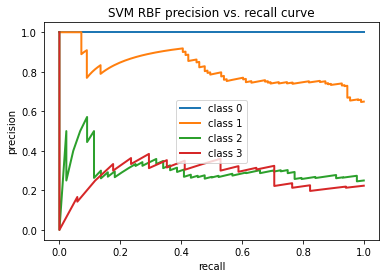

In [273]:
draw_pr_curve('SVM RBF',Y_test,y_score)

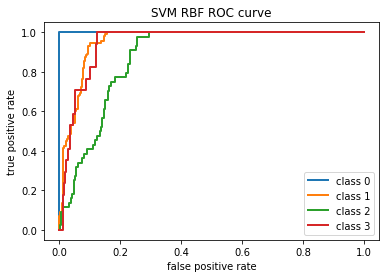

In [274]:
draw_roc_curve('SVM RBF',Y_test,y_score)

In [275]:
clf = OneVsRestClassifier(svm.SVC(C=100,kernel='linear',probability=True))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [276]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
tree_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("SVM linear test score:",tree_test)

SVM linear test score: 0.8071309151108853


In [277]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.75      0.81      0.78       111
  11-20 Days       0.00      0.00      0.00        44
    20+ Days       0.00      0.00      0.00        17

   micro avg       0.93      0.83      0.88       494
   macro avg       0.44      0.45      0.44       494
weighted avg       0.82      0.83      0.83       494
 samples avg       0.83      0.83      0.83       494



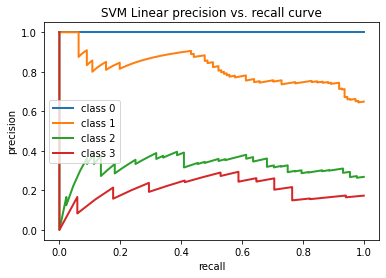

In [278]:
draw_pr_curve('SVM Linear',Y_test,y_score)

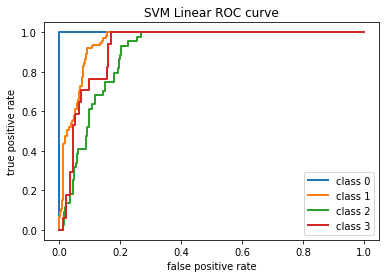

In [279]:
draw_roc_curve('SVM Linear',Y_test,y_score)

In [280]:
clf = OneVsRestClassifier(svm.SVC(C=1000,degree=2,kernel='poly',probability=True))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [281]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
tree_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("SVM Poly test score:",tree_test)

SVM Poly test score: 0.8109453497639693


In [282]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.74      0.86      0.79       111
  11-20 Days       0.00      0.00      0.00        44
    20+ Days       0.00      0.00      0.00        17

   micro avg       0.93      0.84      0.88       494
   macro avg       0.44      0.46      0.45       494
weighted avg       0.82      0.84      0.83       494
 samples avg       0.84      0.84      0.84       494



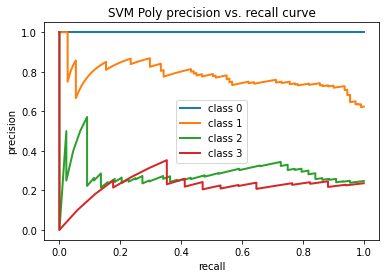

In [283]:
draw_pr_curve('SVM Poly',Y_test,y_score)

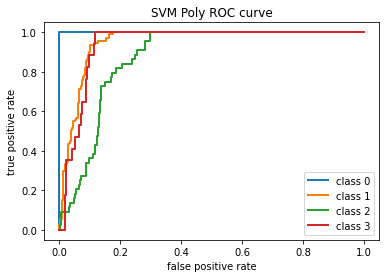

In [284]:
draw_roc_curve('SVM Poly',Y_test,y_score)

### XGBoost

In [81]:
from xgboost import XGBClassifier
params = {'n_estimators':[250,500,750],'learning_rate':[0.001,0.01,0.1],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='multi:softmax',random_state=42)
clf = GridSearchCV(xgb2,params,cv=3,scoring=scorer)
clf.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softmax',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [250, 5

In [82]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500}
0.8532779029224185


In [286]:
clf = OneVsRestClassifier(XGBClassifier(learning_rate=0.001,max_depth=3,n_estimators=500))
clf.fit(X_train_scaled_m, Y_train_m)

y_score = clf.predict_proba(X_test_scaled_m)

In [287]:
y_pred = clf.fit(X_train_scaled_m, Y_train_m).predict(X_test_scaled_m)
tree_test = metrics.average_precision_score(Y_test_m, y_pred,average='weighted')
print("XGBoost test score:",tree_test)

XGBoost test score: 0.8139700699896737


In [288]:
print(classification_report(Y_test_m, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
   0-10 Days       0.74      0.88      0.80       111
  11-20 Days       0.00      0.00      0.00        44
    20+ Days       0.50      0.06      0.11        17

   micro avg       0.92      0.85      0.89       494
   macro avg       0.56      0.49      0.48       494
weighted avg       0.83      0.85      0.84       494
 samples avg       0.85      0.85      0.85       494



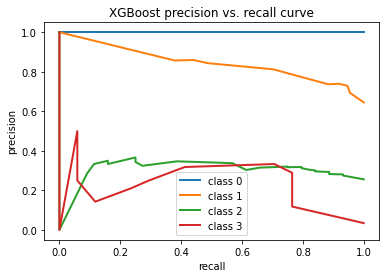

In [289]:
draw_pr_curve('XGBoost',Y_test,y_score)

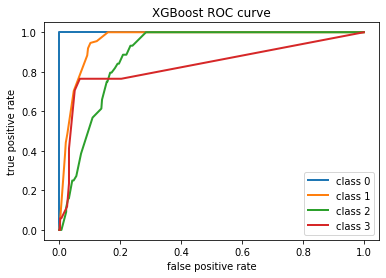

In [290]:
draw_roc_curve('XGBoost',Y_test,y_score)

### Conclusion

All the models are performing good on the on time class and not so good on the 20+ day class. Since the optimization criteria has been for the precision i.e, we do not want to go after customers/invoices which will be paid on time and concentrate only on the invoices that are predicted to be late.

Hence we need to select the model that gives the best precision on the 3 classes that belong to late payment.

Decision Tree is the best performing for the 0-10 and 11-20 Days classes and XGBoost is the best performing for the 20+ Days class.

All the model gives better performance when there are just 2 levels, on time and late but that would not add much value to the debt collection team as they wouln't know which items to go after early and late.